In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Part-1: Data Exploration and Pre-processing

In [88]:
# Load the dataset
df=pd.read_excel(r"C:\Users\HP\OneDrive\Desktop\Resume Project\ML\Loan Credit KNN\Loan Application.xlsx")

In [89]:
df

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1
...,...,...,...,...,...,...,...
8990,30.80,3,3,0.596748,763,0,0
8991,31.83,3,6,0.986793,532,0,0
8992,32.67,2,5,0.628330,590,0,0
8993,37.00,3,3,0.797193,812,0,0


In [90]:
# check for null value
df.isnull().sum()

Age                           0
Total Work Experience         0
Number of years in city       0
Cost to Request Ratio         0
Cibil score                   0
Overdrafts past12months       0
Total bounces past12months    0
dtype: int64

In [91]:
# Get basic information from data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         8995 non-null   float64
 1   Total Work Experience       8995 non-null   int64  
 2   Number of years in city     8995 non-null   int64  
 3   Cost to Request Ratio       8995 non-null   float64
 4   Cibil score                 8995 non-null   int64  
 5   Overdrafts past12months     8995 non-null   int64  
 6   Total bounces past12months  8995 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 492.0 KB


In [92]:
# Describe the dataset 
df.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,38.808202,2.131073,4.288160,0.831183,752.626570,0.322068,1.162757
std,10.203371,0.892141,1.269416,0.490216,67.645792,0.914998,2.352798
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.662147,730.000000,0.000000,0.000000
50%,37.200000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000
75%,45.400000,3.000000,5.000000,0.930908,797.000000,0.000000,1.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,12.000000,12.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_10104\4219917620.py:3: UserWarning: You passed a edgecolor/edgecolors ('blue') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(df['Age'],df['Total Work Experience'],marker="+",edgecolors="blue")


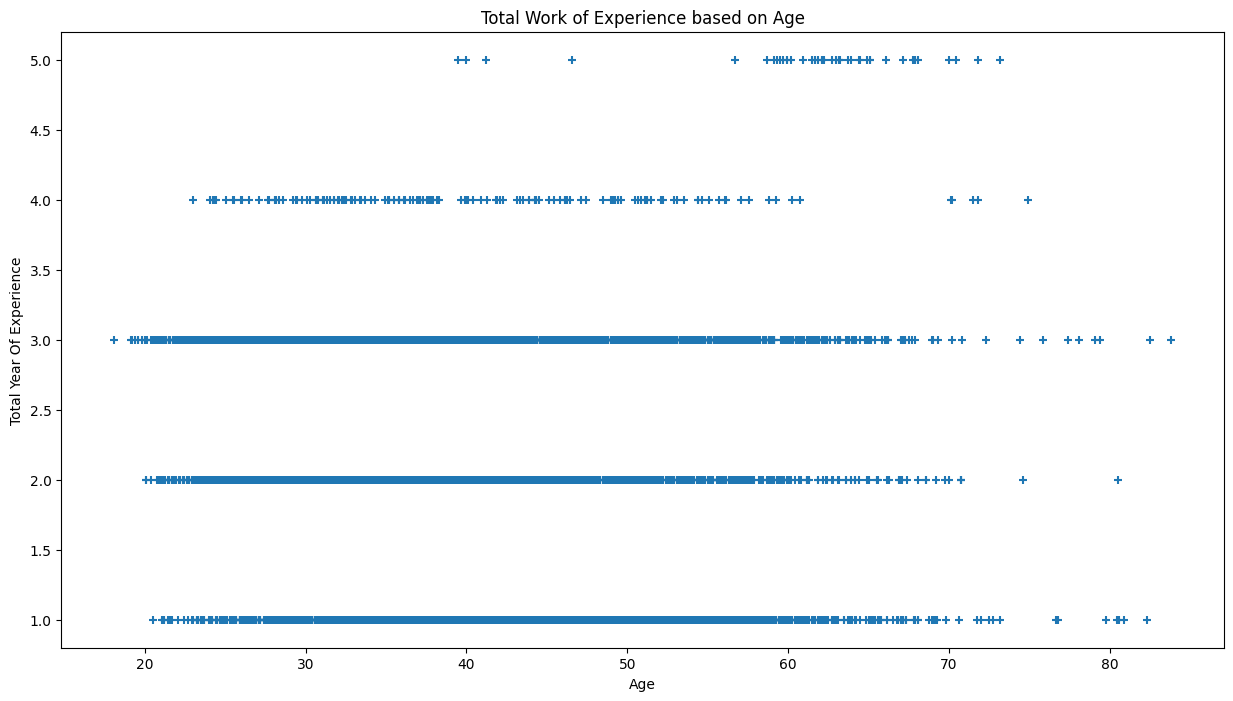

In [93]:
 # Display scatterplot between age & Total work Experience 
plt.figure(figsize=(15,8))
plt.scatter(df['Age'],df['Total Work Experience'],marker="+",edgecolors="blue")
plt.xlabel("Age")
plt.ylabel("Total Year Of Experience")
plt.title("Total Work of Experience based on Age")
plt.show()

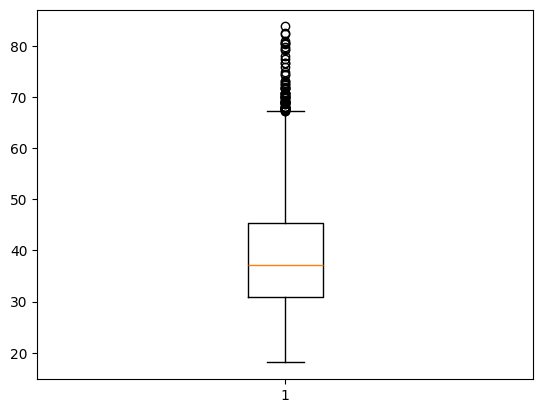

In [94]:
#  Display box plot for age 
plt.boxplot(df['Age'])
plt.show()

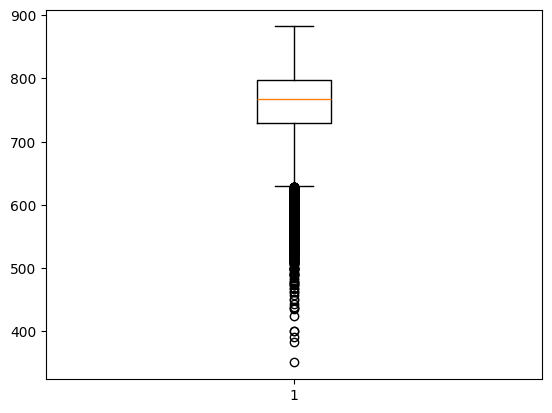

In [95]:
# Display box plot for Cibil score 
plt.boxplot(df['Cibil score'])
plt.show()

In [96]:
# Create target and features data where target is Total bounces past 12 months
x=df.drop(['Total bounces past12months'],axis=1)
y=df['Total bounces past12months']

In [97]:
x

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months
0,40.50,2,6,0.842666,594,0
1,41.25,5,2,0.791667,754,0
2,39.50,5,2,0.727273,779,0
3,35.00,1,4,0.820232,818,0
4,34.00,3,3,0.455581,853,0
...,...,...,...,...,...,...
8990,30.80,3,3,0.596748,763,0
8991,31.83,3,6,0.986793,532,0
8992,32.67,2,5,0.628330,590,0
8993,37.00,3,3,0.797193,812,0


In [98]:

y

0       0
1       0
2       0
3       0
4       1
       ..
8990    0
8991    0
8992    0
8993    0
8994    0
Name: Total bounces past12months, Length: 8995, dtype: int64

# Part-2: Working with Model 

In [99]:
# Split data into training and testing sets 

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [101]:
x_train.shape

(7196, 6)

In [102]:
x_test.shape

(1799, 6)

In [103]:
from sklearn.neighbors import KNeighborsClassifier

In [104]:
# Create a KNN classifier between Features and target data
clf=KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [105]:
# Display the test score 
clf.score(x_test,y_test)

0.6397998888271261

In [106]:
# Display the train score 
clf.score(x_train,y_train)

0.6773207337409672

In [107]:
# Print the accuracy score 
prediction=clf.predict(x_test)

In [108]:
from sklearn.metrics import accuracy_score

In [109]:
accuracy_score(y_test,prediction)

0.6397998888271261

In [110]:
# try 1 to 14 k values for classifier 
from sklearn.neighbors import KNeighborsClassifier
test_score=[]
train_score=[]

for i in range(1,15):
    model=KNeighborsClassifier(i)
    model.fit(x_train,y_train)

    train_score.append(model.score(x_train,y_train))
    test_score.append(model.score(x_test,y_test))

In [112]:
print(test_score)

[0.5519733185102835, 0.6403557531962201, 0.6353529738743746, 0.6425792106725959, 0.6397998888271261, 0.6442468037798778, 0.6481378543635353, 0.6520289049471929, 0.6581434130072262, 0.6553640911617565, 0.6620344635908838, 0.6642579210672596, 0.6620344635908838, 0.6642579210672596]


In [113]:
print(train_score)

[1.0, 0.7395775430794886, 0.7056698165647582, 0.6876042245692051, 0.6773207337409672, 0.6696775986659255, 0.6634241245136187, 0.660366870483602, 0.6575875486381323, 0.6559199555308505, 0.6570316842690384, 0.6550861589772096, 0.6534185658699277, 0.6521678710394664]


In [115]:
#  Display training and testing score for all the 1 to 14 k values
import seaborn as sns

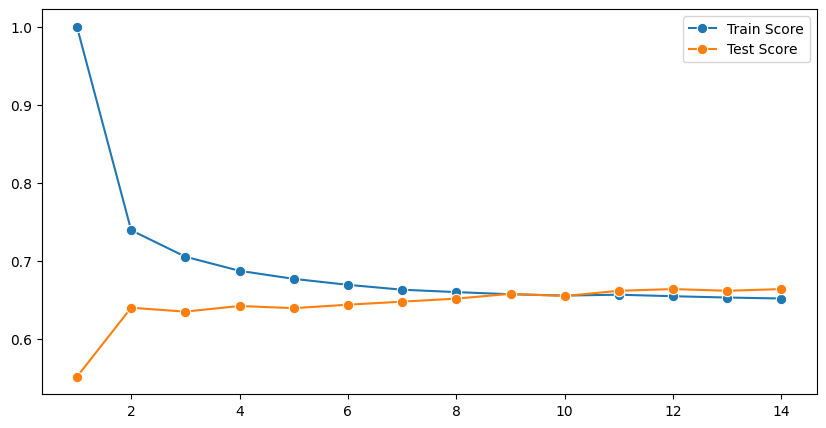

In [127]:
plt.figure(figsize=(10,5))
p=sns.lineplot(x=range(1,15),y=train_score,marker=".",markersize=15,label="Train Score")
p=sns.lineplot(x=range(1,15),y=test_score,marker=".",markersize=15,label="Test Score")